In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 169.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 158.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 147.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 136.6 MB/s eta 0:00:00


In [2]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-04-08 11:37:21--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  66.0MB/s    in 2.3s    

2025-04-08 11:37:24 (66.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
!pip install seaborn
import seaborn as sns

/tmp/ipykernel_337/3711876970.py:25: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
/tmp/ipykernel_337/3711876970.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Job Satisfaction", bbox_to_anchor=(1.05, 1), loc='upper left')


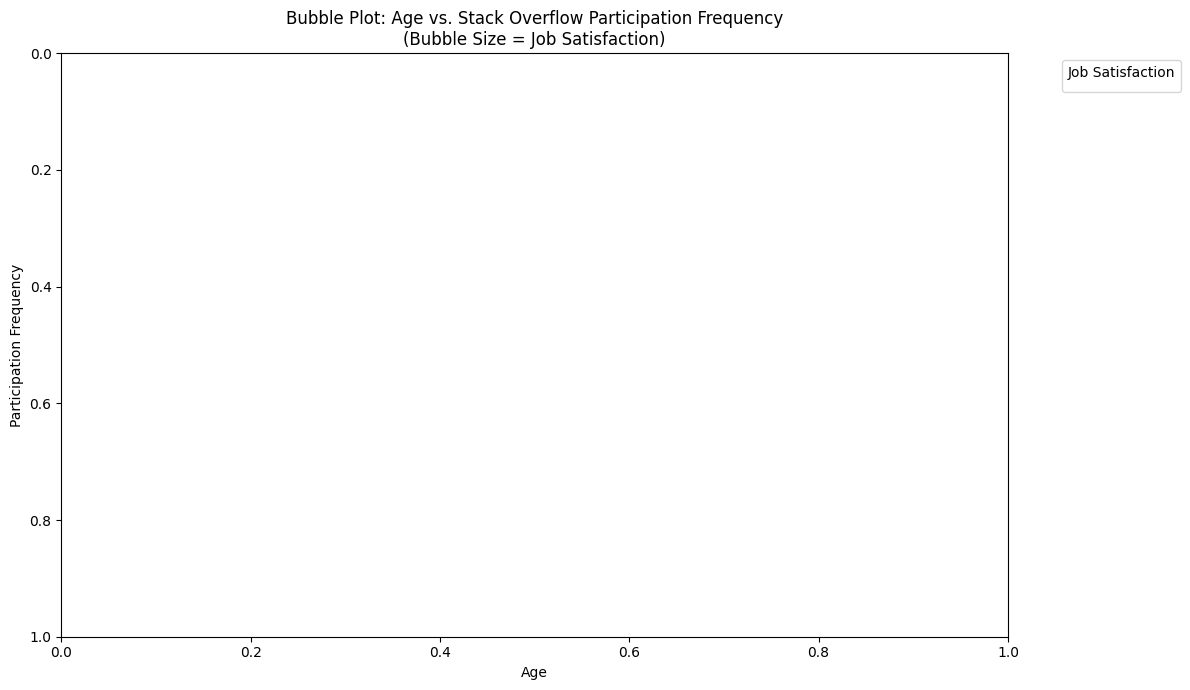

In [7]:
#1. Bubble Plot for Age vs. Frequency of Participation
df = pd.read_csv("survey-data.csv")
df_bubble = df[["Age", "SOPartFreq", "JobSat"]].dropna()

df_bubble["Age"] = pd.to_numeric(df_bubble["Age"], errors="coerce")
df_bubble = df_bubble[df_bubble["Age"].between(18, 70)]


satisfaction_map = {
    "Very dissatisfied": 1,
    "Dissatisfied": 2,
    "Neither satisfied nor dissatisfied": 3,
    "Satisfied": 4,
    "Very satisfied": 5
}
df_bubble["JobSatNumeric"] = df_bubble["JobSat"].map(satisfaction_map)

df_bubble["SOPartFreq"] = df_bubble["SOPartFreq"].astype(str)

order = ["Never", "Less than once per month", "Less than once per week but more than once per month",
         "At least once per week", "Daily or almost daily"]
df_bubble["SOPartFreq"] = pd.Categorical(df_bubble["SOPartFreq"], categories=order, ordered=True)

df_bubble = df_bubble[df_bubble["SOPartFreq"].notna()]
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_bubble,
    x="Age",
    y="SOPartFreq",
    size="JobSatNumeric",
    hue="JobSatNumeric",
    palette="coolwarm",
    sizes=(20, 300),
    alpha=0.6,
    edgecolor="black",
    legend="brief"
)
plt.title("Bubble Plot: Age vs. Stack Overflow Participation Frequency\n(Bubble Size = Job Satisfaction)")
plt.xlabel("Age")
plt.ylabel("Participation Frequency")
plt.legend(title="Job Satisfaction", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_337/195720334.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
/tmp/ipykernel_337/195720334.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Age", bbox_to_anchor=(1.05, 1), loc='upper left')


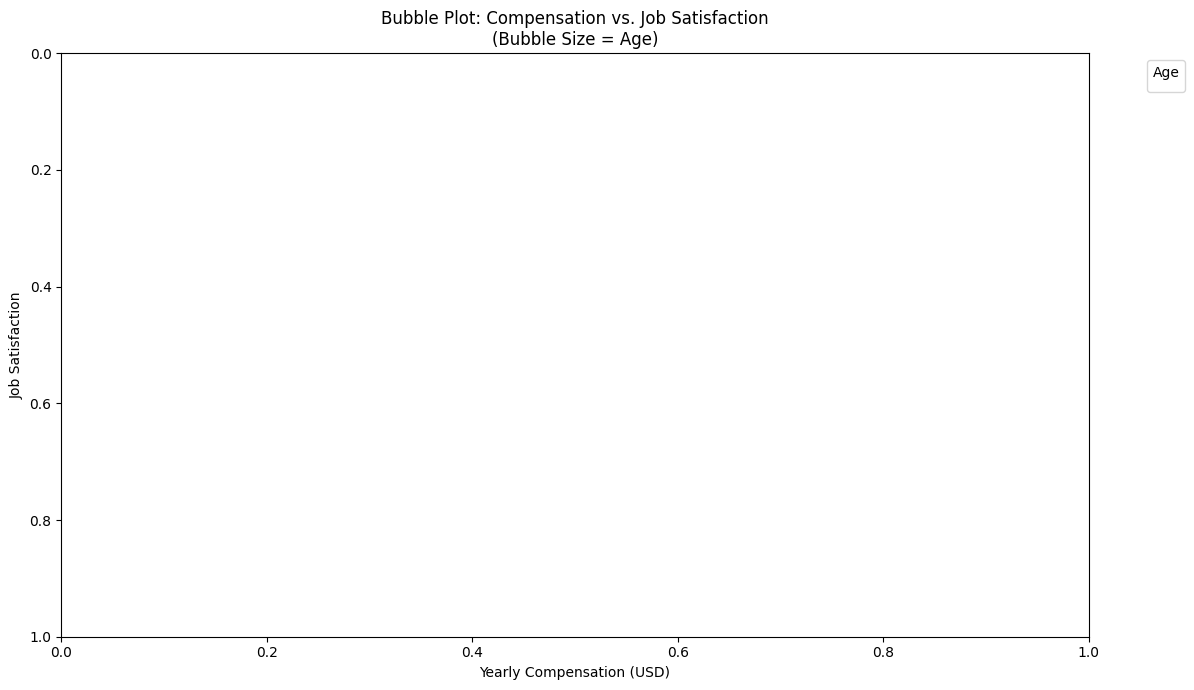

In [10]:
#2. Bubble Plot for Compensation vs. Job Satisfaction
df = pd.read_csv("survey-data.csv")

df_bubble = df[["ConvertedCompYearly", "JobSat", "Age"]].dropna()

df_bubble["Age"] = pd.to_numeric(df_bubble["Age"], errors="coerce")
df_bubble["ConvertedCompYearly"] = pd.to_numeric(df_bubble["ConvertedCompYearly"], errors="coerce")
mapping_age_group = { "Under 18 years old": 18, "18-24 years old": (18+24)/2, "25-34 years old": (25+34)/2, "35-44 years old": (35+44)/2, "45-54 years old": (45+54)/2, "55-64 years old": (55+64)/2, "65 years or older": 65 }
df['AgeMapped'] = df['Age'].map(mapping_age_group)
age_groups = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
df_bubble = df_bubble[
    (df_bubble["ConvertedCompYearly"] < 500000) &
    (df_bubble["Age"] >= 18) & (df_bubble["Age"] <= 70)
]

job_sat_order = ["Very dissatisfied", "Dissatisfied", "Neither satisfied nor dissatisfied", "Satisfied", "Very satisfied"]
df_bubble["JobSat"] = pd.Categorical(df_bubble["JobSat"], categories=job_sat_order, ordered=True)

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_bubble,
    x="ConvertedCompYearly",
    y="JobSat",
    size="Age",
    hue="Age",
    palette="viridis",
    sizes=(20, 300),
    alpha=0.6,
    edgecolor="black",
    legend="brief"
)
plt.title("Bubble Plot: Compensation vs. Job Satisfaction\n(Bubble Size = Age)")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction")
plt.legend(title="Age", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
from collections import Counter

/tmp/ipykernel_337/3514048858.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lang_counts = df_lang.groupby(["AgeGroup", "Language"]).size().reset_index(name="Frequency")
/tmp/ipykernel_337/3514048858.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  bubble = sns.scatterplot(
/tmp/ipykernel_337/3514048858.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Frequency", bbox_to_anchor=(1.05, 1), loc='upper left')


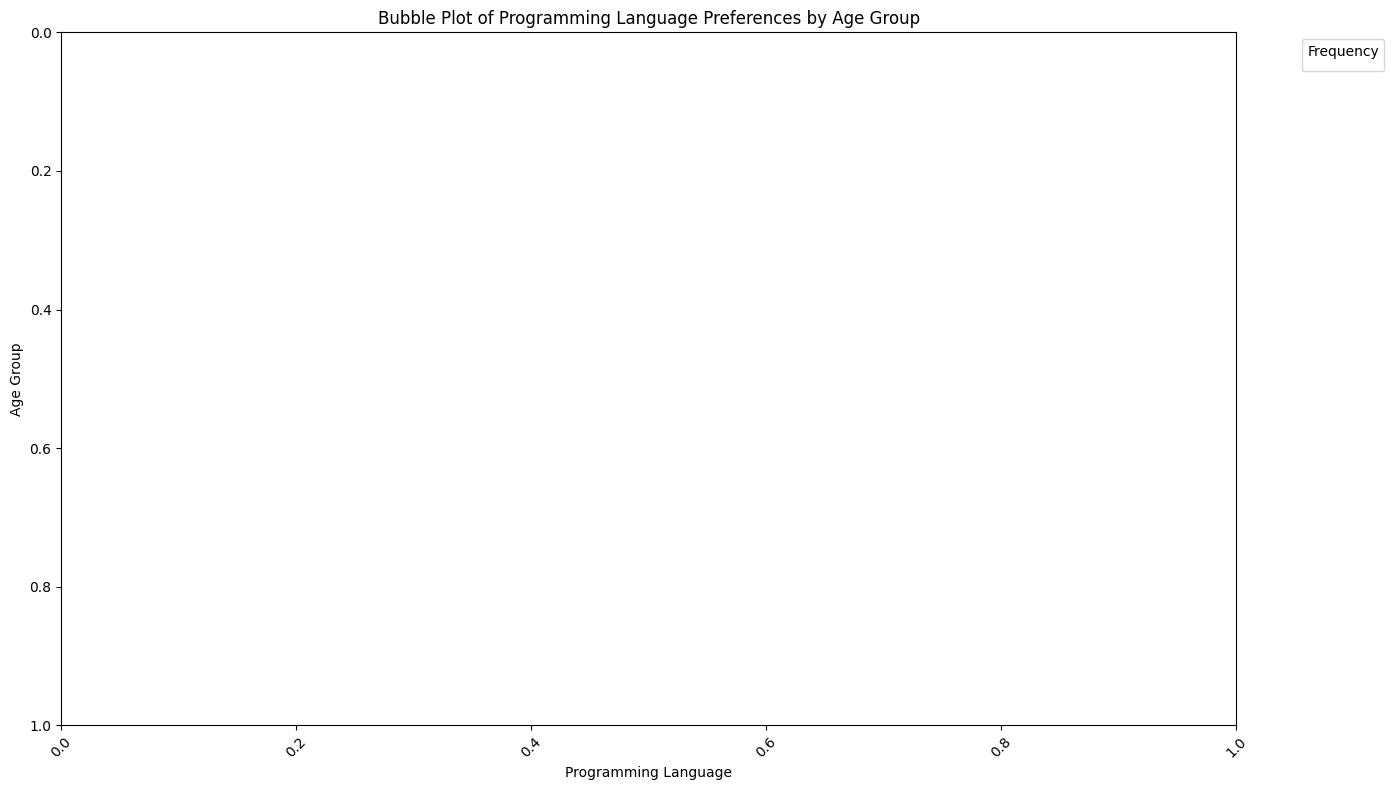

In [12]:
#1. Bubble Plot of Technology Preferences by Age
df_lang = df[["Age", "LanguageHaveWorkedWith"]].dropna()

df_lang["Age"] = pd.to_numeric(df_lang["Age"], errors="coerce")
df_lang = df_lang.dropna(subset=["Age"])
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
df_lang["AgeGroup"] = pd.cut(df_lang["Age"], bins=bins, labels=labels)

df_lang = df_lang.assign(Language=df_lang["LanguageHaveWorkedWith"].str.split(';')).explode("Language")

lang_counts = df_lang.groupby(["AgeGroup", "Language"]).size().reset_index(name="Frequency")

top_languages = lang_counts.groupby("Language")["Frequency"].sum().nlargest(10).index
lang_counts = lang_counts[lang_counts["Language"].isin(top_languages)]

plt.figure(figsize=(14, 8))
bubble = sns.scatterplot(
    data=lang_counts,
    x="Language",
    y="AgeGroup",
    size="Frequency",
    hue="Frequency",
    palette="coolwarm",
    sizes=(50, 600),
    legend="brief",
    alpha=0.7
)


plt.title("Bubble Plot of Programming Language Preferences by Age Group")
plt.xlabel("Programming Language")
plt.ylabel("Age Group")
plt.xticks(rotation=45)
plt.legend(title="Frequency", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

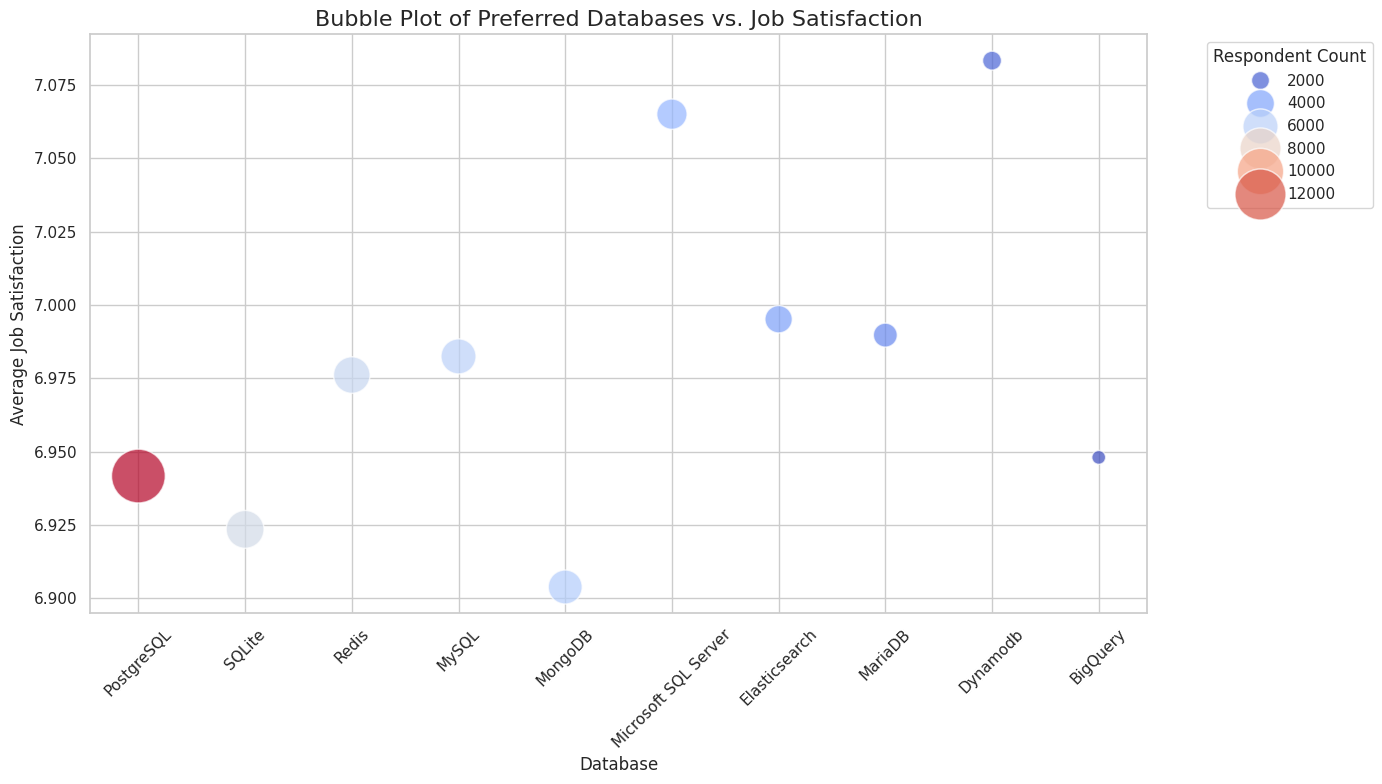

In [13]:
#2. Bubble Plot for Preferred Databases vs. Job Satisfaction
df_db = df[["DatabaseWantToWorkWith", "JobSat"]].dropna()

df_db["Database"] = df_db["DatabaseWantToWorkWith"].str.split(';')
df_db = df_db.explode("Database")

bubble_data = df_db.groupby("Database").agg(
    RespondentCount=('Database', 'count'),
    AvgJobSat=('JobSat', lambda x: pd.to_numeric(x, errors='coerce').mean())
).reset_index()

top_dbs = bubble_data.sort_values("RespondentCount", ascending=False).head(10)


plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

bubble = sns.scatterplot(
    data=top_dbs,
    x="Database",
    y="AvgJobSat",
    size="RespondentCount",
    sizes=(100, 1500),
    hue="RespondentCount",
    palette="coolwarm",
    alpha=0.7,
    legend="brief"
)


plt.title("Bubble Plot of Preferred Databases vs. Job Satisfaction", fontsize=16)
plt.xlabel("Database", fontsize=12)
plt.ylabel("Average Job Satisfaction", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Respondent Count", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_337/3357598965.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  bubble = sns.scatterplot(
/tmp/ipykernel_337/3357598965.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Avg Job Satisfaction", bbox_to_anchor=(1.05, 1), loc='upper left')


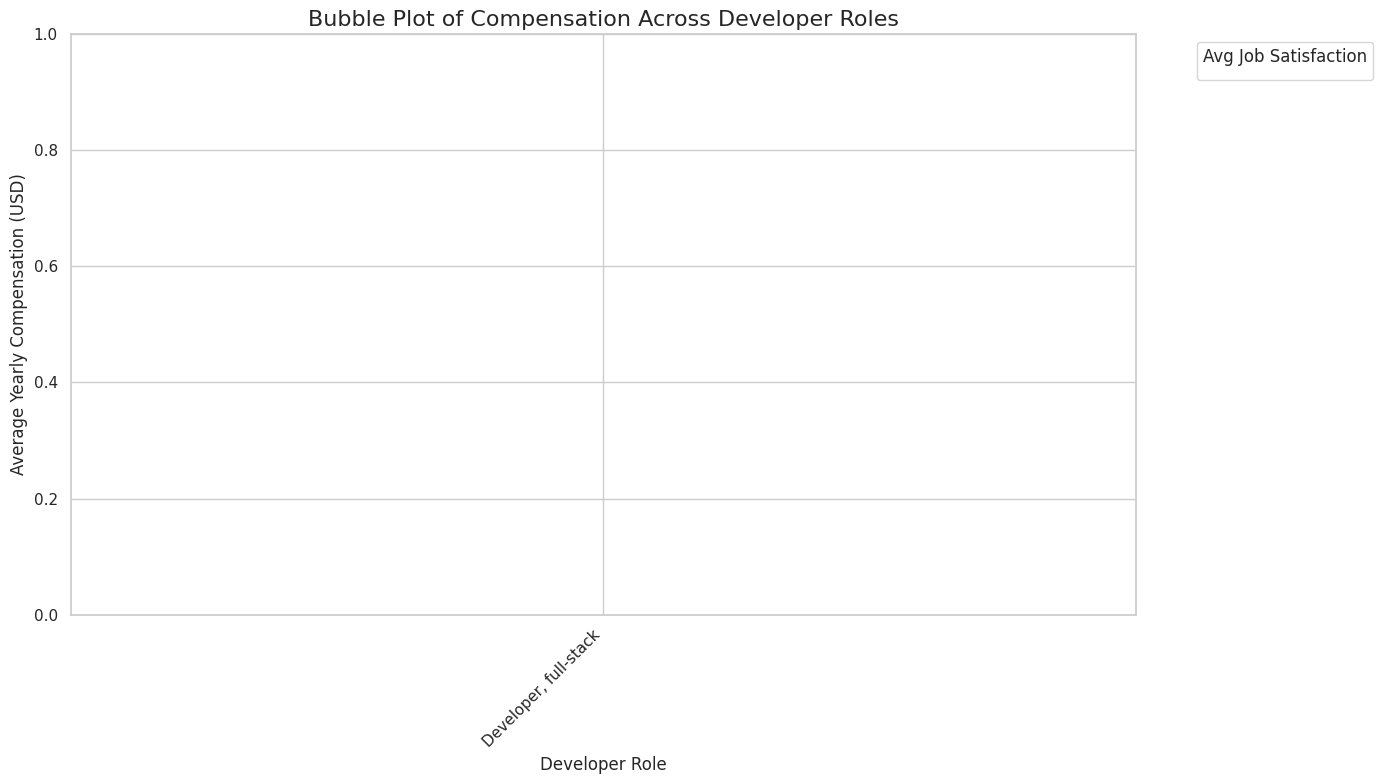

In [14]:
#1. Bubble Plot for Compensation Across Developer Roles
df_bubble = df[["DevType", "ConvertedCompYearly", "JobSat"]].dropna()

df_bubble["DevType"] = df_bubble["DevType"].str.split(';')
df_bubble = df_bubble.explode("DevType")

job_sat_map = {
    "Very dissatisfied": 1,
    "Slightly dissatisfied": 2,
    "Neither satisfied nor dissatisfied": 3,
    "Slightly satisfied": 4,
    "Very satisfied": 5
}
df_bubble["JobSatScore"] = df_bubble["JobSat"].map(job_sat_map)

grouped = df_bubble.groupby("DevType").agg(
    AvgComp=('ConvertedCompYearly', 'mean'),
    AvgJobSat=('JobSatScore', 'mean'),
    RespondentCount=('DevType', 'count')
).reset_index()

top_roles = grouped.sort_values("RespondentCount", ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

bubble = sns.scatterplot(
    data=top_roles,
    x="DevType",
    y="AvgComp",
    size="AvgJobSat",
    sizes=(100, 2000),
    hue="AvgJobSat",
    palette="viridis",
    alpha=0.8,
    legend="brief"
)

plt.title("Bubble Plot of Compensation Across Developer Roles", fontsize=16)
plt.xlabel("Developer Role", fontsize=12)
plt.ylabel("Average Yearly Compensation (USD)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Avg Job Satisfaction", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_337/2582171483.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Frequency", bbox_to_anchor=(1.05, 1), loc='upper left')


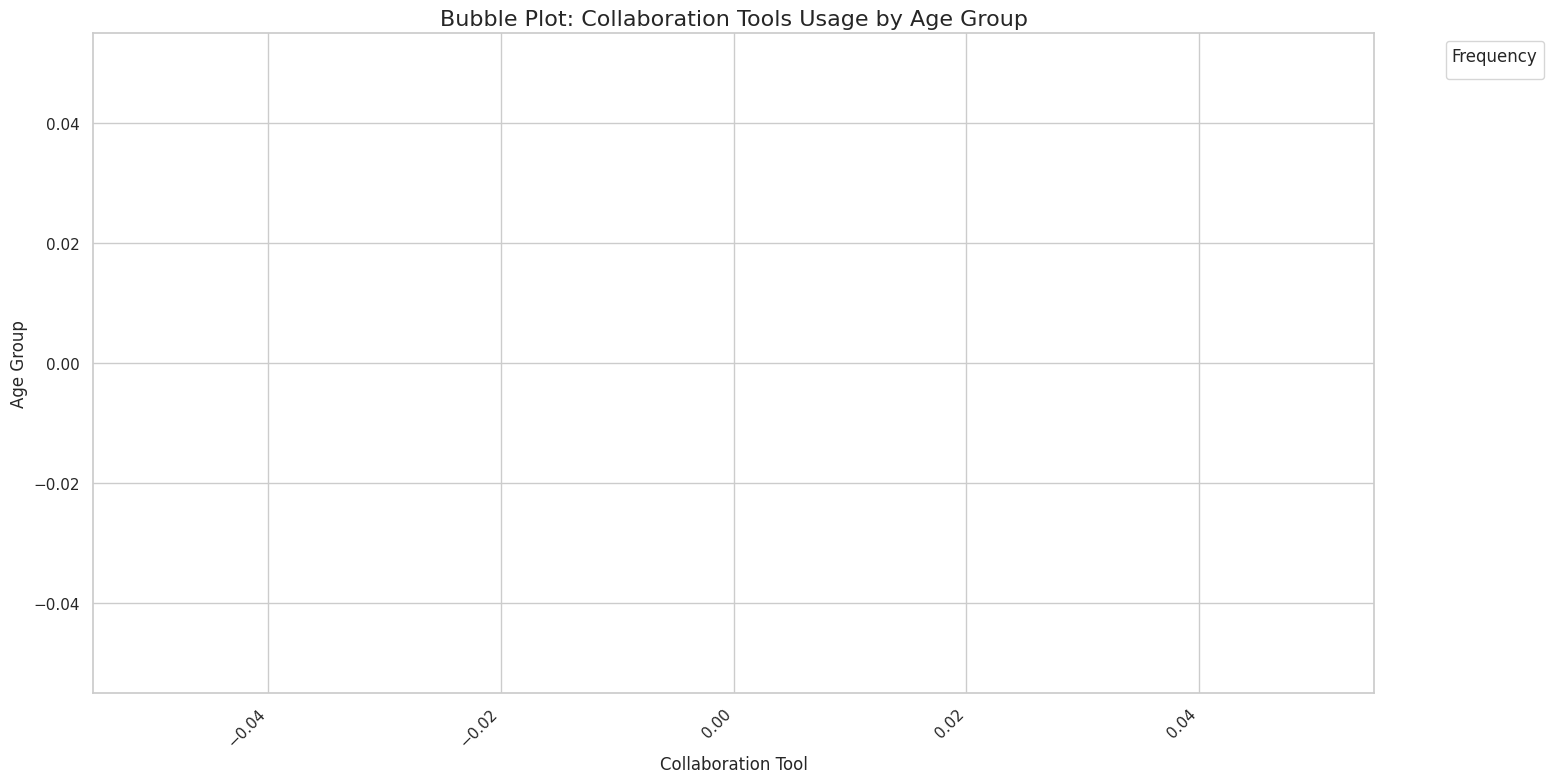

In [15]:
#2. Bubble Plot for Collaboration Tools by Age
df_bubble = df[["NEWCollabToolsHaveWorkedWith", "Age"]].dropna()
def age_group(age):
    try:
        age = float(age)
        if age < 20:
            return "<20"
        elif 20 <= age < 30:
            return "20–29"
        elif 30 <= age < 40:
            return "30–39"
        elif 40 <= age < 50:
            return "40–49"
        elif 50 <= age < 60:
            return "50–59"
        else:
            return "60+"
    except:
        return None

df_bubble["AgeGroup"] = df_bubble["Age"].apply(age_group)

df_bubble["NEWCollabToolsHaveWorkedWith"] = df_bubble["NEWCollabToolsHaveWorkedWith"].str.split(';')
df_bubble = df_bubble.explode("NEWCollabToolsHaveWorkedWith")

grouped = df_bubble.groupby(["NEWCollabToolsHaveWorkedWith", "AgeGroup"]).size().reset_index(name="Frequency")


plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

bubble = sns.scatterplot(
    data=grouped,
    x="NEWCollabToolsHaveWorkedWith",
    y="AgeGroup",
    size="Frequency",
    sizes=(100, 1500),
    alpha=0.7,
    legend="brief"
)

plt.title("Bubble Plot: Collaboration Tools Usage by Age Group", fontsize=16)
plt.xlabel("Collaboration Tool", fontsize=12)
plt.ylabel("Age Group", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title="Frequency", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

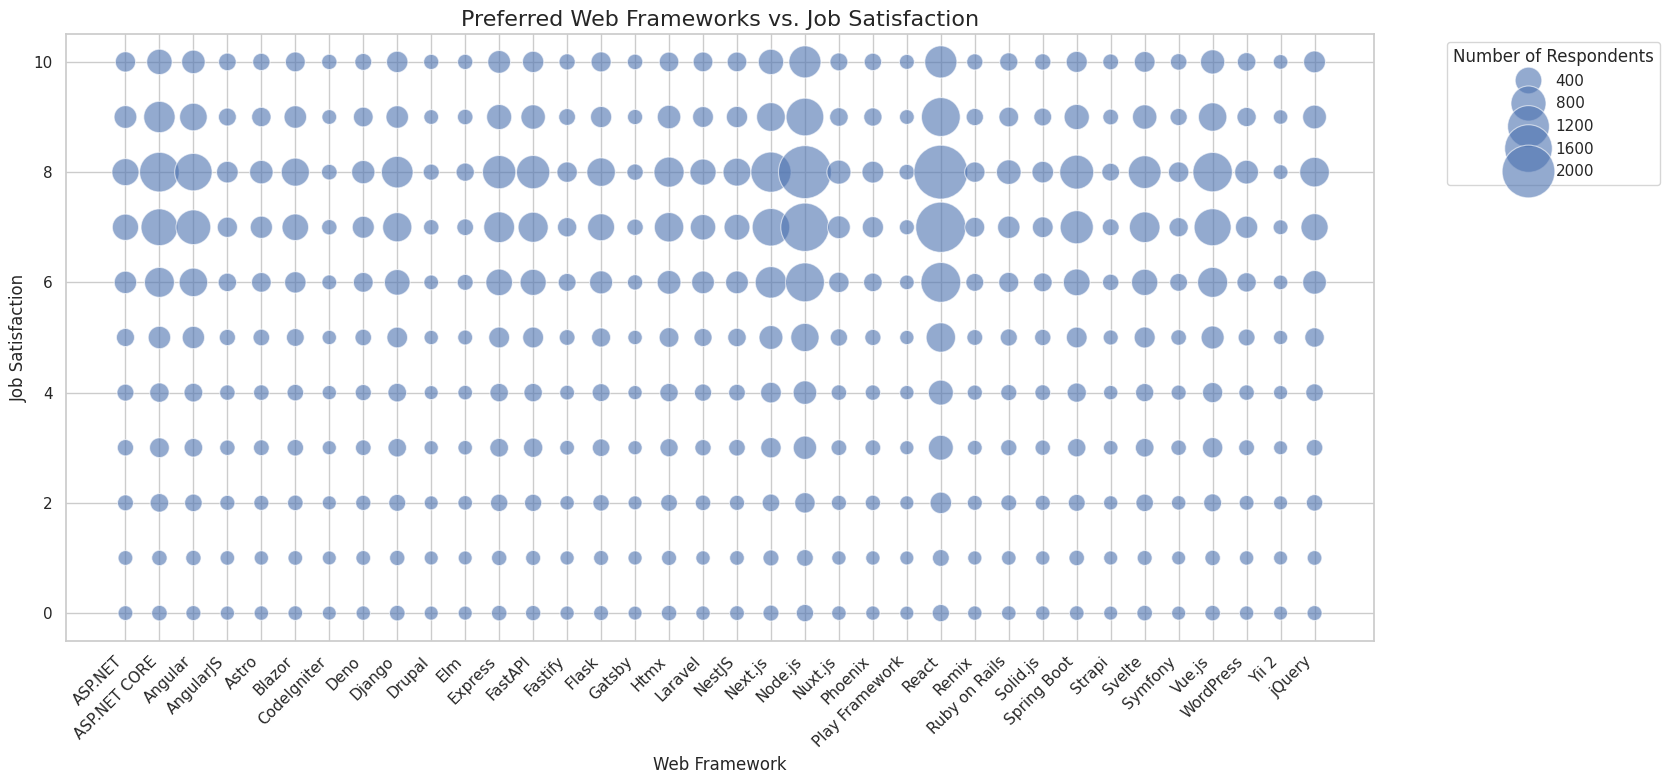

In [16]:
#1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction
df_bubble = df[["WebframeWantToWorkWith", "JobSat"]].dropna()


df_bubble["WebframeWantToWorkWith"] = df_bubble["WebframeWantToWorkWith"].str.split(";")
df_bubble = df_bubble.explode("WebframeWantToWorkWith")


grouped = df_bubble.groupby(["WebframeWantToWorkWith", "JobSat"]).size().reset_index(name="Frequency")


plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

bubble = sns.scatterplot(
    data=grouped,
    x="WebframeWantToWorkWith",
    y="JobSat",
    size="Frequency",
    sizes=(100, 1500),
    alpha=0.6,
    legend="brief"
)


plt.title("Preferred Web Frameworks vs. Job Satisfaction", fontsize=16)
plt.xlabel("Web Framework", fontsize=12)
plt.ylabel("Job Satisfaction", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title="Number of Respondents", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
#2. Bubble Plot for Admired Technologies Across Countries
